In [1]:
# Mount Google Drive
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir("/content/drive/MyDrive/Colab Notebooks/DisseDATA")

Mounted at /content/drive/


In [2]:
import pandas as pd
import numpy as np

In [23]:
pip install openpyxl

In [24]:
df= pd.read_csv('Tweet.csv')
df1= pd.read_csv('Company_Tweet.csv')

df = pd.merge(df, df1, on='tweet_id', how='left')
df['datetime'] = pd.to_datetime(df['post_date'], unit='s')
df['quarter'] = df['datetime'].dt.to_period('Q')

df.head(10)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,datetime,quarter
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01 00:00:57,2015Q1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01 00:01:36,2015Q1
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01 00:01:50,2015Q1
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01 00:06:47,2015Q1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01 00:10:05,2015Q1
5,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01 00:10:05,2015Q1
6,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01 00:10:05,2015Q1
7,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01 00:10:05,2015Q1
8,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01 00:10:05,2015Q1
9,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01 00:10:05,2015Q1


In [25]:
company_quarter_counts = df.groupby(['ticker_symbol', 'quarter']).size().reset_index(name='count')

target_sample_ratio = 0.1

company_quarter_counts['sample_size'] = (company_quarter_counts['count'] * target_sample_ratio).round().astype(int)

company_quarter_counts['sample_size'] = company_quarter_counts['sample_size'].replace(0, 1)

def sample_tweets(group, sample_sizes):
    company = group.name[0]
    quarter = group.name[1]
    sample_size = sample_sizes.loc[(sample_sizes['ticker_symbol'] == company) &
                                   (sample_sizes['quarter'] == quarter), 'sample_size'].values[0]
    return group.sample(n=min(len(group), sample_size))

sampled_df = df.groupby(['ticker_symbol', 'quarter']).apply(sample_tweets, sample_sizes=company_quarter_counts).reset_index(drop=True)


In [26]:
sampled_df.shape

(433650, 10)

# data clean

In [27]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer


import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [28]:
def clean_text(text):
    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = re.sub(r'\d+', '', text)

    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]

    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    return ' '.join(stemmed_words)

sampled_df['cleaned_body'] = sampled_df['body'].apply(clean_text)
print(sampled_df[['body', 'cleaned_body']].head())


                                                body  \
0           @HenisJPatel back to recovery mode $aapl   
1  Hope I win this #iPad mini from @ValueWalk! $A...   
2  Join me on tsū, is sharing social revenues wit...   
3  Don't be fooled $AAPL $SPY $QQQ pay attention ...   
4  "@venkysrinivasan: Looks like a buyer of 1180 ...   

                                        cleaned_body  
0                henisjpatel back recoveri mode aapl  
1  hope win ipad mini valuewalk aapl httpvaluewal...  
2  join tsū share social revenu us httpgooglzgqio...  
3           dont fool aapl spi qqq pay attent eurusd  
4  venkysrinivasan look like buyer march cs aapl ...  


# Process


In [29]:
!pip install transformers torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [30]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
from scipy.special import softmax
import pandas as pd
from tqdm import tqdm

In [31]:
import torch

if torch.cuda.is_available():
    print("GPU is available")
    device = torch.device("cuda")
else:
    print("GPU not available, using CPU instead")
    device = torch.device("cpu")


GPU is available


In [32]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch


model_path = "/content/drive/My Drive/Colab Notebooks/DisseDATA/model"

tokenizer = RobertaTokenizer.from_pretrained(model_path)

model = RobertaForSequenceClassification.from_pretrained(model_path)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

def sentiment_score(review_text):
    encoded_review = tokenizer.encode_plus(
        review_text,
        max_length=512,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    input_ids = encoded_review['input_ids'].to(device)
    attention_mask = encoded_review['attention_mask'].to(device)

    with torch.no_grad():
        output = model(input_ids, attention_mask)
        scores = output[0][0].detach().cpu().numpy()
        scores = softmax(scores)

    return scores

sampled_df['sentiment_scores'] = sampled_df['cleaned_body'].apply(sentiment_score)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2760: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [44]:
def calculate_sentiment_score(scores):

    return (1 * scores[0]) + (0.5 * scores[1]) + (-1 * scores[2])

sampled_df['sentiment_score'] = sampled_df['sentiment_scores'].apply(calculate_sentiment_score)

In [45]:

sampled_df['ticker_symbol'] = sampled_df['ticker_symbol'].replace('GOOGL', 'GOOG')

unique_ticker_count = sampled_df['ticker_symbol'].nunique()
print(f"Unique ticker symbols count: {unique_ticker_count}")

unique_tickers = sampled_df['ticker_symbol'].unique()
print("Unique ticker symbols:", unique_tickers)


Unique ticker symbols count: 5
Unique ticker symbols: ['AAPL' 'AMZN' 'GOOG' 'MSFT' 'TSLA']


In [36]:
sampled_df.to_excel("sampled_df_final.xlsx", index=False, engine='openpyxl')

In [46]:
import pandas as pd
average_sentiment_scores = sampled_df.groupby(['ticker_symbol', 'quarter'])['sentiment_score'].agg(['mean', 'median']).reset_index()
average_sentiment_scores.rename(columns={'mean': 'average_sentiment_score', 'median': 'median_sentiment_score'}, inplace=True)
print(average_sentiment_scores.head())

  ticker_symbol quarter  average_sentiment_score  median_sentiment_score
0          AAPL  2015Q1                 0.328378                0.444827
1          AAPL  2015Q2                 0.367308                0.460846
2          AAPL  2015Q3                 0.389841                0.466049
3          AAPL  2015Q4                 0.393642                0.463540
4          AAPL  2016Q1                 0.424324                0.474853


In [47]:
average_sentiment_scores.to_excel("average_sentiment_scores_final.xlsx", index=False, engine='openpyxl')

# decrease

In [3]:
import pandas as pd
df_A = pd.read_excel('sampled_df_final.xlsx')
unique_ticker_count = df_A['ticker_symbol'].nunique()
print(f"Unique ticker symbols count: {unique_ticker_count}")
unique_tickers = df_A['ticker_symbol'].unique()
print("Unique ticker symbols:", unique_tickers)


Unique ticker symbols count: 5
Unique ticker symbols: ['AAPL' 'AMZN' 'GOOG' 'MSFT' 'TSLA']


  ticker_symbol  Tweet_Count
0          AAPL       142503
1          AMZN        71872
2          GOOG        72015
3          MSFT        37571
4          TSLA       109689


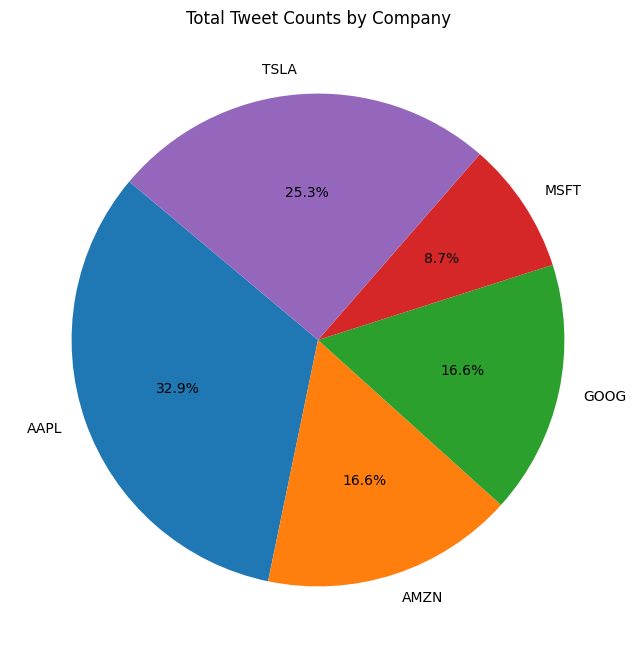

In [4]:
import matplotlib.pyplot as plt

total_tweet_counts = df_A.groupby('ticker_symbol').size().reset_index(name='Tweet_Count')
print(total_tweet_counts)
plt.figure(figsize=(10, 8))
plt.pie(total_tweet_counts['Tweet_Count'], labels=total_tweet_counts['ticker_symbol'], autopct='%1.1f%%', startangle=140)
plt.title('Total Tweet Counts by Company', fontweight='bold')
plt.show()


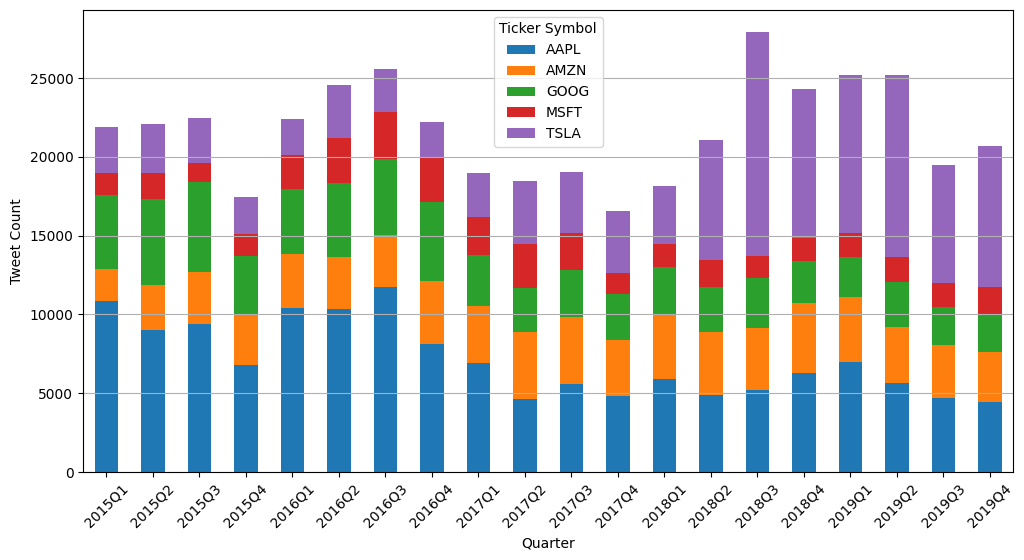

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

tweet_counts = df_A.groupby(['quarter', 'ticker_symbol']).size().reset_index(name='tweet_count')

pivot_table = tweet_counts.pivot(index='quarter', columns='ticker_symbol', values='tweet_count')

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.xlabel('Quarter')
plt.ylabel('Tweet Count')
plt.legend(title='Ticker Symbol')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


# average_sentiment_scores

In [6]:
df_S = pd.read_excel('average_sentiment_scores_final.xlsx')

In [9]:
grouped_descriptive_stats = df_S.groupby('ticker_symbol').describe()

grouped_descriptive_stats


average_sentiment_score                                          \
                                count      mean       std       min       25%   
ticker_symbol                                                                   
AAPL                             20.0  0.347520  0.048083  0.267329  0.302012   
AMZN                             20.0  0.351561  0.011074  0.335465  0.343885   
GOOG                             20.0  0.380471  0.015876  0.351643  0.367098   
MSFT                             20.0  0.369831  0.024143  0.337674  0.353100   
TSLA                             20.0  0.403701  0.016245  0.374060  0.391405   

                                            median_sentiment_score            \
                    50%       75%       max                  count      mean   
ticker_symbol                                                                  
AAPL           0.351871  0.390637  0.424324                   20.0  0.450116   
AMZN           0.350392  0.359022  0.378951                   20.0  0.442220   
GOOG           0.383243  0.391328  0.406249                   20.0  0.449601   
MSFT           0.363665  0.389355  0.412787                   20.0  0.449508   
TSLA           0.402190  0.412844  0.433702                   20.0  0.467547   

                                                                           
                    std       min       25%       50%       75%       max  
ticker_symbol                                                              
AAPL           0.013299  0.432094  0.437445  0.447529  0.461404  0.474853  
AMZN           0.009399  0.429852  0.434711  0.440396  0.445377  0.461652  
GOOG           0.010540  0.438619  0.442524  0.444876  0.452943  0.474555  
MSFT           0.006986  0.438711  0.445121  0.448729  0.452711  0.465824  
TSLA           0.007381  0.455104  0.461224  0.469113  0.473497  0.477989

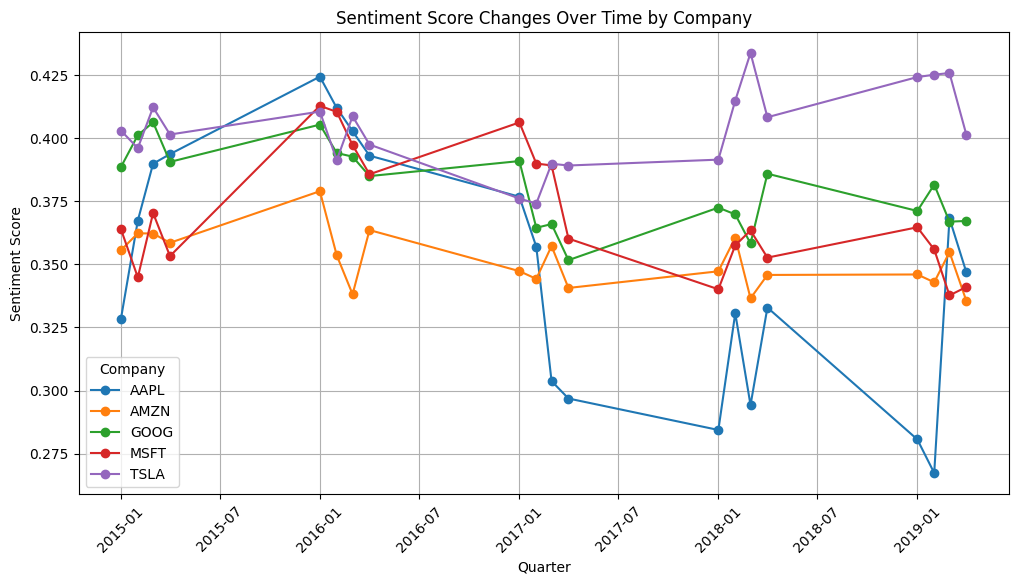

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df_S['quarter'] = df_S['quarter'].astype(str)


df_S['quarter'] = pd.to_datetime(
    df_S['quarter'].str[:4] + '-' +
    df_S['quarter'].str[5:].replace({'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}) + '-01'
)

plt.figure(figsize=(12, 6))


for ticker in df_S['ticker_symbol'].unique():
    company_data = df_S[df_S['ticker_symbol'] == ticker]
    plt.plot(company_data['quarter'], company_data['average_sentiment_score'], marker='o', linestyle='-', label=ticker)
plt.title('Sentiment Score Changes Over Time by Company')
plt.xlabel('Quarter')
plt.ylabel('Sentiment Score')
plt.legend(title='Company')
plt.grid(True)
plt.xticks(rotation=45)

plt.show()
